<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Logistic Regression with Python


Estimated time needed: **30** minutes
    

## Objectives

After completing this lab you will be able to:

* Use Logistic Regression for classification
* Preprocess data for modeling
* Implement Logistic regression on real world data


## Install and import the required libraries
Make sure the required libraries are available by executing the cell below.


In [1]:
%pip install numpy==2.2.0
%pip install pandas==2.2.3
%pip install scikit-learn==1.6.0
%pip install matplotlib==3.9.3

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Let's first import required libraries:


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Classification with Logistic Regression

### Scenario
Assume that you are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.


### About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 
<br><br>
This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.


### Load Data from URL


In [3]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the scikit-learn algorithm:


## Data Preprocessing


For this lab, we can use a subset of the fields available to develop out model. Let us assume that the fields we use are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.


In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')

churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


For modeling the input fields X and the target field y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining fields as the input. Store these values in the variable 'X'.


In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]  #print the first 5 values

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(churn_df['churn'])
y[0:5] #print the first 5 values

array([1, 1, 0, 0, 0])

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.


In [7]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Splitting the dataset


The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. For this, we may make use of the train_test_split function in the scikit-learn library.


In [8]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling


Let's build the model using __LogisticRegression__ from the Scikit-learn package and fit our model with train data set.


In [9]:
LR = LogisticRegression().fit(X_train,y_train)

Fitting, or in simple terms training, gives us a model that has now learnt from the traning data and can be used to predict the output variable. Let us predict the churn parameter for the test data set.


In [10]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

To understand this prediction, we can also have a look at the prediction probability of data point of the test data set. Use the function __predict_proba__ , we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.


In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Since the purpose here is to predict the 1 class more acccurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.


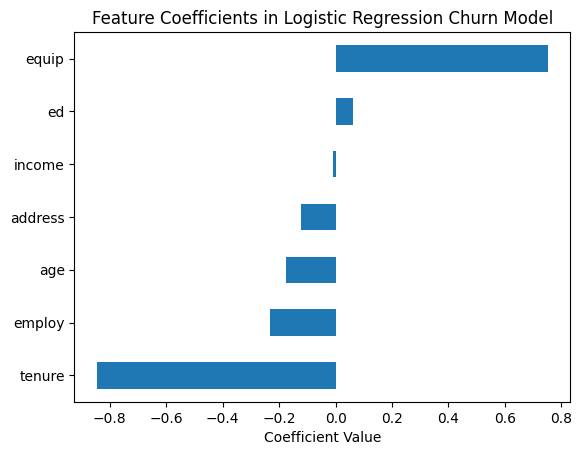

In [12]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.  


## Performance Evaluation


Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us evaluate the log-loss value.

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.


In [13]:
log_loss(y_test, yhat_prob)

0.6257718410257235

In [14]:
del(X, y, X_train, X_test, y_train, y_test, yhat, yhat_prob, LR, coefficients)

## Practice Exercises
Try to attempt the following questions yourself based on what you learnt in this lab.

<br>

a. Let us assume we add the feature 'callcard' to the original set of input features. What will the value of log loss be in this case?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.6039104035600186.
</details>

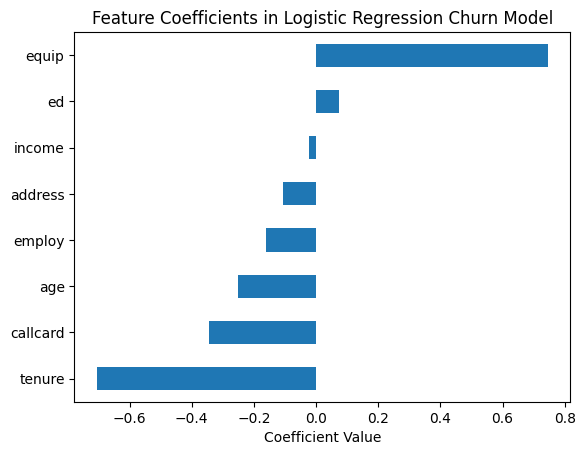

0.6039104035600186

In [15]:
# Data Preprocessing
churn_dfa = pd.read_csv(url)
churn_dfa = churn_dfa[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'churn']]
churn_dfa['churn'] = churn_dfa['churn'].astype('int')
X = np.asarray(churn_dfa[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard']])
y = np.asarray(churn_dfa['churn'])
X_norm = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#-----------------------------------------------------
# Model Evaluation
coefficients = pd.Series(LR.coef_[0], index=churn_dfa.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()
log_loss(y_test, yhat_prob)

b. Let us assume we add the feature 'wireless' to the original set of input features. What will the value of log loss be in this case?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.7227054293985518.
</details>

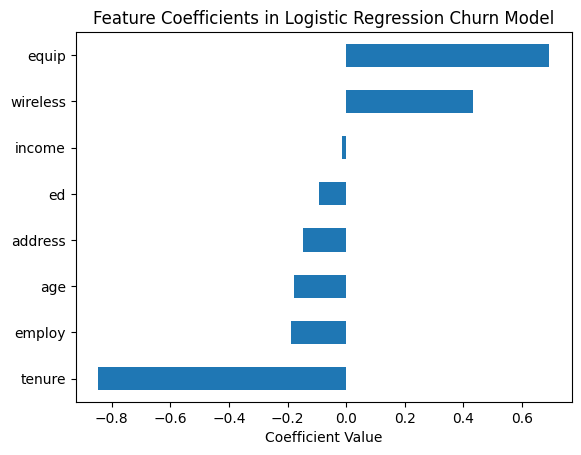

0.7227054293985518

In [16]:
# Data Preprocessing
churn_dfb = pd.read_csv(url)
churn_dfb = churn_dfb[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless', 'churn']]
churn_dfb['churn'] = churn_dfb['churn'].astype('int')
X = np.asarray(churn_dfb[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'wireless']])
y = np.asarray(churn_dfb['churn'])
X_norm = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#-----------------------------------------------------
# Model Evaluation
coefficients = pd.Series(LR.coef_[0], index=churn_dfb.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()
log_loss(y_test, yhat_prob)

c. What happens to the log loss value if we add both "callcard" and "wireless" to the input features?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.7760557225417114
</details>

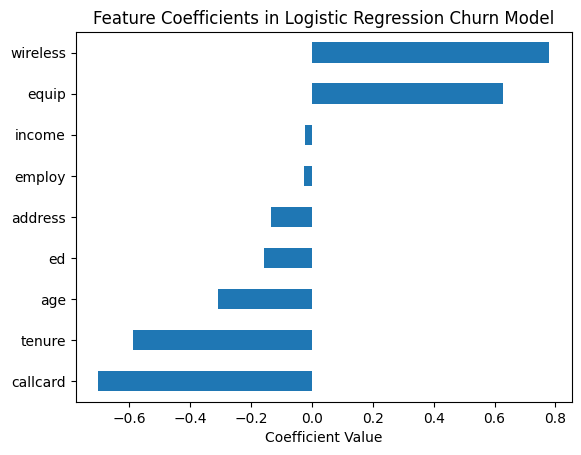

0.7760557225417115

In [17]:
# Data Preprocessing
churn_dfc = pd.read_csv(url)
churn_dfc = churn_dfc[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
churn_dfc['churn'] = churn_dfc['churn'].astype('int')
X = np.asarray(churn_dfc[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']])
y = np.asarray(churn_dfc['churn'])
X_norm = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#-----------------------------------------------------
# Model Evaluation
coefficients = pd.Series(LR.coef_[0], index=churn_dfc.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()
log_loss(y_test, yhat_prob)

d. What happens to the log loss if we remove the feature 'equip' from the original set of input features?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df Make sure to edit the list of features feeding the variable X. The expected answer is 0.5302427350245369
</details>

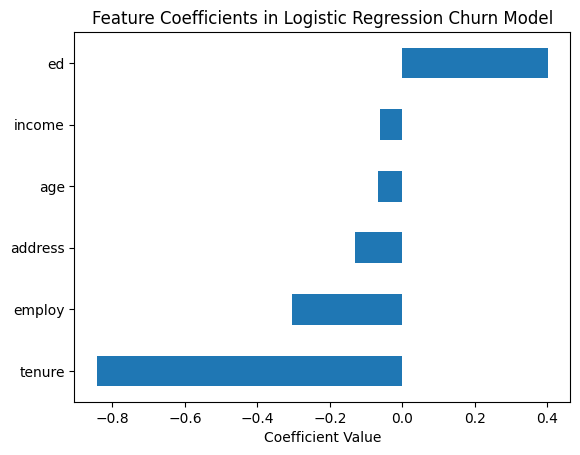

0.5302427350245369

In [18]:
# Data Preprocessing
churn_dfd = pd.read_csv(url)
churn_dfd = churn_dfd[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]
churn_dfd['churn'] = churn_dfd['churn'].astype('int')
X = np.asarray(churn_dfd[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
y = np.asarray(churn_dfd['churn'])
X_norm = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#-----------------------------------------------------
# Model Evaluation
coefficients = pd.Series(LR.coef_[0], index=churn_dfd.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()
log_loss(y_test, yhat_prob)

e. What happens to the log loss if we remove the features 'income' and 'employ' from the original set of input features?
<br>
<details><summary>Hint</summary>
Reuse all the code statements above after modifying the value of churn_df. Make sure to edit the list of features feeding the variable X. The expected answer is 0.7821990869010905.
</details>

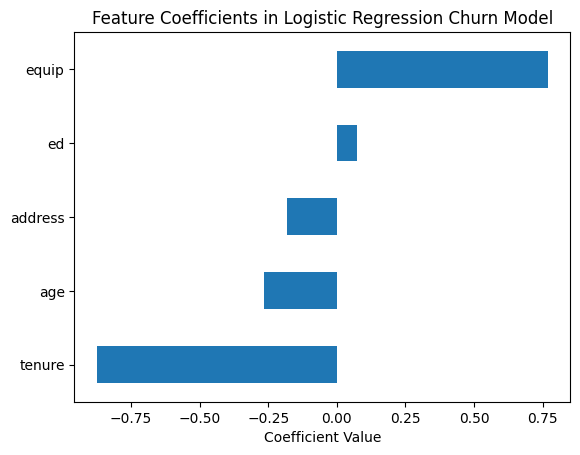

0.6529317169884828

In [19]:
churn_dfe = pd.read_csv(url)
churn_dfe = churn_dfe[['tenure', 'age', 'address', 'ed', 'equip', 'churn']]
churn_dfe['churn'] = churn_dfe['churn'].astype('int')
X = np.asarray(churn_dfe[['tenure', 'age', 'address', 'ed', 'equip']])
y = np.asarray(churn_dfe['churn'])
X_norm = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
#-----------------------------------------------------
# Model Evaluation
coefficients = pd.Series(LR.coef_[0], index=churn_dfe.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()
log_loss(y_test, yhat_prob)

### Congratulations! You're ready to move on to your next lesson!
 
 
## Author
 
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abishek Gagneja</a>
 
 
 ### Other Contributors
 
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>
 
<!--
## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
|2024-11-05 | 3.0 | Abhishek | Updated the descriptions, codes and lab flow | 
|2021-01-21  | 2.2  | Lakshmi  |  Updated sklearn library|
| 2020-11-03  | 2.1  | Lakshmi  |  Updated URL of csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


<h3 align="center">© IBM Corporation. All rights reserved.</h3>
